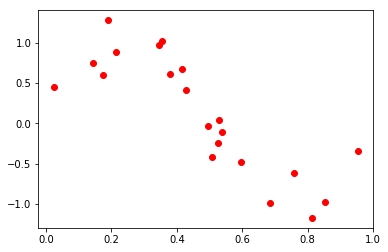

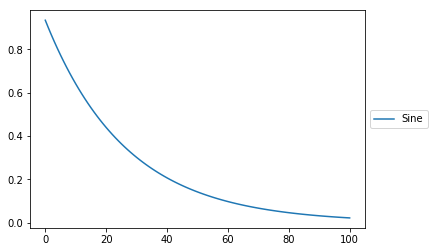

In [36]:
# libraries
from autograd import numpy as np

# import the dataset
csvname = 'datasets/' + 'noisy_sin_sample.csv'
data = np.loadtxt(csvname,delimiter=',')

# cut into input/output data
x = data[0:-1,:]
y = data[-1:,:]
w = np.array([[1.0, 1.0], [1.0, 1.0]]) 

#print(w_0)

#print(w)
f = feature_transforms(x,w)
g = least_squares
weight_history,cost_history = gradient_descent(g,0.01,100,w)
plt.figure()
plt.plot(x,y,'ro')
plt.show()
#print(cost_history[-1])
plot_cost_histories([cost_history],labels = ["Sine"])
#model(f,weight_history[-1])

In [3]:
import matplotlib.pyplot as plt
def plot_cost_histories(cost_histories,labels):
    # create figure
    plt.figure()
    
    # loop over cost histories and plot each one
    for j in range(len(cost_histories)):
        history = cost_histories[j]
        label = labels[j]
        plt.plot(history,label = label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [4]:
# import automatic differentiator to compute gradient module
from autograd import grad 

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

In [2]:
# an implementation of our model employing a nonlinear feature transformation
def model(x,w):
# feature transformation

# compute linear combination and return
    a = w[1][0] + np.dot(f.T,w[1][1:]) 
    return a.T

In [1]:
def feature_transforms(x,w):
# calculate feature transform
    f = np.sin(w[0] + np.dot(x.T,w[1:])).T 
    return f

In [23]:
def least_squares(w):
    cost = np.sum((np.dot(f.T,w) - f.T)**2) 
    return cost/float(np.size(f))